In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


In [2]:
data = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')

In [3]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
import datetime as dt
import calendar

# Renaming columns for better clarity
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
data['Frequency'] = data['Frequency'].astype('category')
data['Region'] = data['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
data['Month'] = data['Date'].dt.month

# Converting 'Month' to integer format
data['Month_int'] = data['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
data['Month_name'] = data['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
data.drop(columns='Month', inplace=True)


In [8]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [9]:
summary_stats = data.describe()
print(summary_stats)

                                Date  Estimated Unemployment Rate  \
count                            267                   267.000000   
mean   2020-06-16 09:15:30.337078528                    12.236929   
min              2020-01-31 00:00:00                     0.500000   
25%              2020-03-31 00:00:00                     4.845000   
50%              2020-06-30 00:00:00                     9.650000   
75%              2020-08-31 00:00:00                    16.755000   
max              2020-10-31 00:00:00                    75.850000   
std                              NaN                    10.803283   

       Estimated Employed  Estimated Labour Participation Rate   longitude  \
count        2.670000e+02                           267.000000  267.000000   
mean         1.396211e+07                            41.681573   22.826048   
min          1.175420e+05                            16.770000   10.850500   
25%          2.838930e+06                            37.265000   1

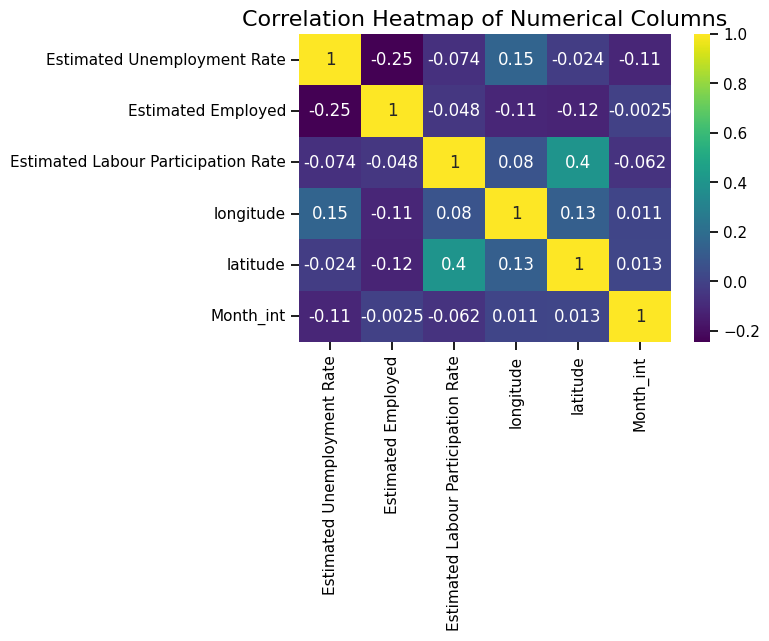

In [20]:
# Filter only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
numerical_data = numerical_data.corr()

plt.figure(figsize=(6, 4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='viridis')

plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)
plt.show()

In [25]:
import plotly.express as px
fig = px.box(data, x='States', y='Estimated Unemployment Rate', color='States',
             title='Boxplot of Unemployment Rate per States',
             labels={'Estimated Unemployment Rate': 'Unemployment Rate (%)'})

fig.update_layout(xaxis_title='States', yaxis_title='Estimated Unemployment Rate (%)')

fig.show()

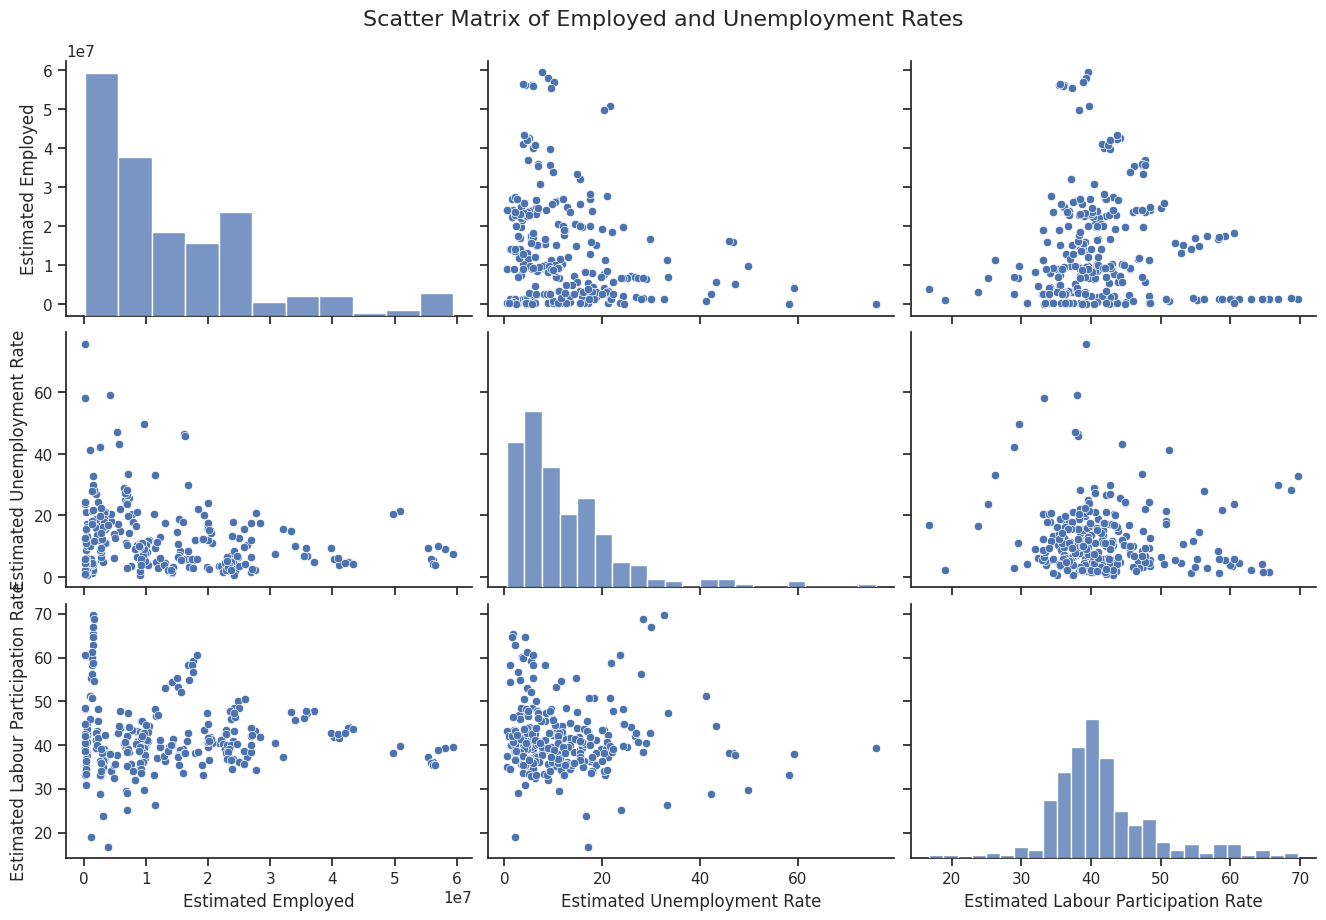

In [29]:
# Select relevant columns
scatter_data = data[['Estimated Employed', 'Estimated Unemployment Rate','Estimated Labour Participation Rate']]

# Create a scatter matrix using Seaborn
sns.set(style='ticks')
scatter_matrix = sns.pairplot(scatter_data, height=3, aspect=1.5)

# Customize the plot
scatter_matrix.fig.suptitle('Scatter Matrix of Employed and Unemployment Rates', y=1.02, fontsize=16)
plt.show()


In [30]:
# Calculate the average unemployment rate for each state
average_unemployment = data.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(average_unemployment, x='States', y='Estimated Unemployment Rate',
             title='Average Unemployment Rate in Each State',
             labels={'Estimated Unemployment Rate': 'Average Unemployment Rate (%)'},
             color='States')

# Customize the layout
fig.update_layout(xaxis_title='States', yaxis_title='Average Unemployment Rate (%)')

# Show the plot
fig.show()


In [34]:
# Filter data for the specified date range
date_range_data = data[(data['Date'] >= '2020-01-01') & (data['Date'] <= '2020-10-31')]

# Create an animated bar plot using Plotly Express
fig = px.bar(date_range_data, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='States',
             title='Unemployment rate across regions from Jan. 2020 to Oct. 2020', height=700, template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Adjusting the animation frame duration
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000

# Show the plot
fig.show()


In [35]:
import plotly.express as px

# Assuming 'data' is your DataFrame containing the necessary columns, including 'Region', 'States', and 'Estimated Unemployment Rate'

# Create a sunburst chart using Plotly Express
fig = px.sunburst(data, path=['Region', 'States'], values='Estimated Unemployment Rate',
                  title='Unemployment Rate in Each Region and State',
                  hover_data=['Estimated Unemployment Rate'],
                  color='Estimated Unemployment Rate',
                  color_continuous_scale='viridis')

# Customize the layout
fig.update_layout(height=600, template='seaborn')

# Show the plot
fig.show()


In [46]:
fig = px.scatter_geo(data,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='seaborn',title='Impack of lockdown on Employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#3399FF",
    showocean=True)

fig.show()

In [55]:

# Filtering data for the period before the lockdown (January to April)
bf_lockdown = data[(data['Month_int'] >= 1) & (data['Month_int'] <= 4)]

# Filtering data for the lockdown period (April to July)
lockdown = data[(data['Month_int'] >= 4) & (data['Month_int'] <= 7)]

# Calculating the mean unemployment rate before lockdown by state
m_bf_lock = bf_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state
m_lock = lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state
m_lock['Unemployment_Rate_before_lockdown'] = m_bf_lock['Estimated Unemployment Rate']
m_lock.rename(columns={'Estimated Unemployment Rate': 'Unemployment_Rate_after_lockdown'}, inplace=True)

# Reshape the DataFrame using pandas melt
melted_data = pd.melt(m_lock, id_vars=['States'], value_vars=['Unemployment_Rate_before_lockdown', 'Unemployment_Rate_after_lockdown'],
                      var_name='Lockdown Phase', value_name='Unemployment Rate')

# Create a bar plot for comparison
fig = px.bar(melted_data, 
             x='States', 
             y='Unemployment Rate',
             color='Lockdown Phase',
             barmode='group',
             title='Mean Unemployment Rate Before and After Lockdown',
             labels={'Unemployment Rate': 'Mean Unemployment Rate (%)'},
             template='seaborn')

# Customize the layout
fig.update_layout(xaxis_title='States', yaxis_title='Mean Unemployment Rate (%)')

# Show the plot
fig.show()


In [56]:
# Calculate the percentage change
m_lock['Percentage Change'] = ((m_lock['Unemployment_Rate_after_lockdown'] - m_lock['Unemployment_Rate_before_lockdown']) / m_lock['Unemployment_Rate_before_lockdown']) * 100

# Reshape the DataFrame using pandas melt
melted_data = pd.melt(m_lock, id_vars=['States'], value_vars=['Unemployment_Rate_before_lockdown', 'Unemployment_Rate_after_lockdown', 'Percentage Change'],
                      var_name='Lockdown Phase', value_name='Value')

# Create a bar plot for percentage change
fig = px.bar(melted_data, 
             x='States', 
             y='Value',
             color='Lockdown Phase',
             barmode='group',
             title='Percentage Change in Unemployment Rate Before and After Lockdown',
             labels={'Value': 'Percentage Change (%)'},
             template='seaborn')

# Customize the layout
fig.update_layout(xaxis_title='States', yaxis_title='Percentage Change (%)')

# Show the plot
fig.show()


In [58]:
# Convert 'Date' to datetime format if not already done
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Choose specific states for time series analysis
selected_states = ['Maharashtra', 'Tamil Nadu', 'Karnataka']

# Filter data for selected states
selected_states_data = data[data['States'].isin(selected_states)]

# Create a line plot for time series analysis
fig_time_series = px.line(selected_states_data, 
                          x='Date', 
                          y='Estimated Unemployment Rate', 
                          color='States',
                          title='Unemployment Rates Time Series for Selected States',
                          labels={'Estimated Unemployment Rate': 'Unemployment Rate (%)'},
                          template='seaborn')

# Show the plot
fig_time_series.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

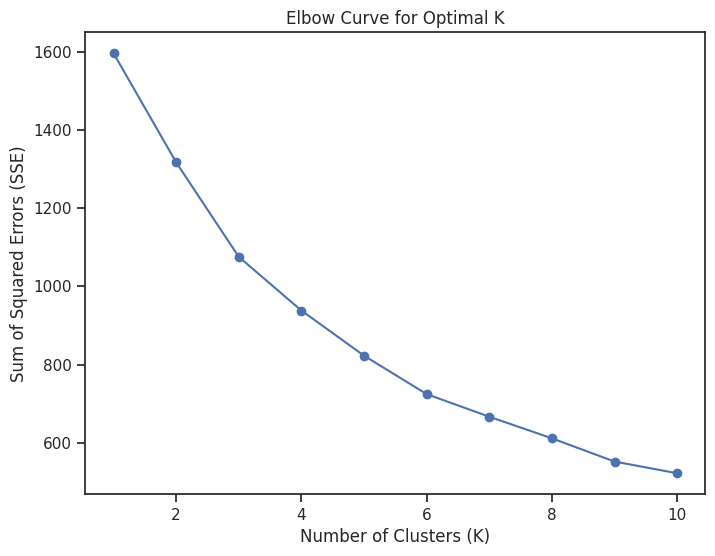

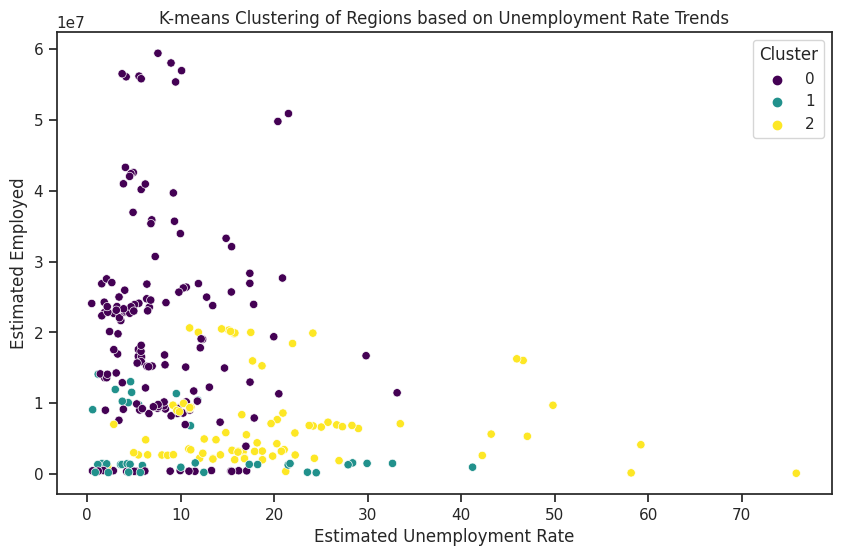

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Select only numerical columns for clustering
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
cluster_data = data[numerical_columns]

# Standardize the data
standardized_data = (cluster_data - cluster_data.mean()) / cluster_data.std()

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Based on the elbow curve, choose an appropriate value for K (number of clusters)
k = 3

# Apply K-means clustering with explicit setting of n_init
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(standardized_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=numerical_columns[0], y=numerical_columns[1], hue='Cluster', data=data, palette='viridis', legend='full')
plt.title('K-means Clustering of Regions based on Unemployment Rate Trends')
plt.show()


In [67]:
# Calculate the percentage change
m_lock['Percentage Change'] = ((m_lock['Unemployment_Rate_after_lockdown'] - m_lock['Unemployment_Rate_before_lockdown']) / m_lock['Unemployment_Rate_before_lockdown']) * 100

# Sort the DataFrame by percentage change in descending order
most_affected_states = m_lock.sort_values(by='Percentage Change', ascending=False)

# Visualize the top N affected states
top_n_states = 10  # Change this value based on the number of states you want to visualize
top_states_fig = px.bar(most_affected_states.head(top_n_states), 
                        x='States', 
                        y='Percentage Change',
                        title=f'Top {top_n_states} Most Affected States by Lockdown',
                        labels={'Percentage Change': 'Percentage Change (%)'},
                        template='seaborn')

# Customize the layout
top_states_fig.update_layout(xaxis_title='States', yaxis_title='Percentage Change (%)')

# Show the plot
top_states_fig.show()